**ENTREGA N° 3**

**INTRODUCCIÓN**

La tarjeta de crédito es un instrumento de pago que debe ser gestionado en una entidad financiera o en una empresa emisora de tarjetas de crédito y será otorgado al solicitante si cumple con los requisitos exigidos.

La entidad le brindará un monto de crédito por el que podrá operar y estará relacionado a los ingresos del solicitante. A diferencia de la tarjeta de débito, los fondos a utilizar no deben estar depositados previamente, sino que a medida que se vaya utilizando para retirar efectivo o realizar pagos se ira generando automáticamente una deuda. Generalmente esta deuda se debe cancelar mensualmente, para lo cual la entidad envía un resumen con todas las transacciones realizadas, la fecha de vencimiento y el monto adeudado.

Este importe puede ser cancelado total o parcialmente y la deuda pendiente acumulará intereses. Una ventaja que otorgan las tarjetas de crédito es la posibilidad de pagar compras a plazos (cuotas).

**DEFINICIÓN DE OBJETIVO**


Es muy importante determinar el accionar de nuestro trabajo, estableciendo pautas claras para poder estructurar paso a paso el recorrido del proyecto de tal forma que podamos llegar a nuestro principal fin:**saber que personas se encuentran aptas para recibir una tarjeta de credito**
Frente a esto, analizaremos diferentes variables fundamentales que recaen sobre cada persona analizada, comparandolas y generando insights que nos acerquen de esta forma a nuestro objetivo principal. Construir un modelo de aprendizaje automático para predecir si un solicitante es un cliente "bueno" o "malo".

**CONTEXTO COMERCIAL**

Las tarjetas de puntaje de crédito son un método común de control de riesgos en la industria financiera. Utiliza información personal y datos enviados por solicitantes de tarjetas de crédito para predecir la probabilidad de futuros incumplimientos y préstamos de tarjetas de crédito. El banco puede decidir si emitir una tarjeta de crédito al solicitante. Los puntajes de crédito pueden cuantificar objetivamente la magnitud del riesgo.

En términos generales, las tarjetas de puntaje de crédito se basan en datos históricos. Una vez que se encuentra con grandes fluctuaciones económicas. Los modelos anteriores pueden perder su poder predictivo original. El modelo logístico es un método común para la calificación crediticia. Porque la logística es adecuada para tareas de clasificación binaria y puede calcular los coeficientes de cada característica. Para facilitar la comprensión y el funcionamiento, la tarjeta de puntuación multiplicará el coeficiente de regresión logística por un cierto valor (como 100) y lo redondeará.

En la actualidad, con el desarrollo de algoritmos de machine learning. Se han introducido métodos más predictivos como Boosting, Random Forest y Support Vector Machines en la puntuación de tarjetas de crédito. Sin embargo, estos métodos a menudo no tienen una buena transparencia. Puede ser difícil proporcionar a los clientes y reguladores una razón para el rechazo o la aceptación.

**PROBLEMA COMERCIAL**

Nuestra tarea es manipular los datos disponibles y proporcionar visualizaciones que respondan a las preguntas especificas que gestionaremos a lo largo de nuestro proyecto.

Partimos de nuestra pregunta central, que es el pilar de nuestro trabajo : **¿LA PERSONA EN CUESTIÓN, SE ENCUENTRA APTA O APROBADA PARA RECIBIR UNA TARJETA DE CREDITO?**

Pero como esta pregunta es muy general, tendremos que desglozarla en varias cuestiones a resolver:

1) ¿Cuantas personas estan dentro de cada grupo deudor?

2) ¿De las personas relevadas, la edad influye en el nivel de educación?

3) ¿Existe una brecha salarial por género dentro del dataset?

4) ¿Hay algun tipo de tendencia deudora dentro de los grupos viviendas?

5) ¿de las personas relevadas, el estado civil influye sobre la densidad de las familias?

6) ¿de las personas relevadas, el nivel de educación influye sobre el tamaño de las familias?

7) ¿de las personas relevadas, la relacion tamaño de familia y cantidad de hijos es mas influyente para mujeres o hombres?







**CONTEXTO ANALÍTICO**

A continuación, proporcionaremos dos archivos csv, donde serán cargadosy convertidos en dataset. Cada archivo cuentan con tablas con columnas y filias. La informacion de estas son las siguientes:

**tabla 1:application_record.csv**

ID	Número de cliente	
CODE_GENDER	Género	
FLAG_OWN_CAR	¿Hay un coche?	
FLAG_OWN_REALTY	¿Hay alguna propiedad?	
CNT_CHILDREN	Número de niños	
AMT_INCOME_TOTAL	Ingresos anuales	
NAME_INCOME_TYPE	Categoría de ingresos	
NAME_EDUCATION_TYPE	Nivel educativo	
NAME_FAMILY_STATUS	Estado civil	
NAME_HOUSING_TYPE	Forma de vida	
DAYS_BIRTH	Cumpleaños	Cuenta hacia atrás desde el día actual (0), -1 significa ayer
DAYS_EMPLOYED	Fecha de inicio del empleo	Cuenta hacia atrás desde el día actual(0). Si es positivo, significa la persona actualmente desempleada.
FLAG_MOBIL	¿Hay un teléfono móvil?	
FLAG_WORK_PHONE	¿Hay un teléfono del trabajo?	
FLAG_PHONE	¿Hay un teléfono?	
FLAG_EMAIL	¿Hay un correo electrónico?	
OCCUPATION_TYPE	Ocupación	
CNT_FAM_MEMBERS	Tamaño de la familia


**tabla 2: credit_record.csv**	

ID	Número de cliente	
MONTHS_BALANCE	Mes récord.	El mes de los datos extraídos es el punto de partida, hacia atrás, 0 es el mes actual, -1 es el mes anterior, y así sucesivamente
STATUS	Estado	


En base a estos archivos procederemos a la carga y limpieza, para poder comenzar con nuestro analisis.

**PROCESAMIENTO DE LA INFORMACION DEL DATASET**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

#Leo el archivo
df = pd.read_csv("application_record.csv")
cr = pd.read_csv("credit_record.csv")

# Normalizar edades
df['AGE_YEARS']=df['DAYS_BIRTH']/365.2425*-1
df.drop('DAYS_BIRTH', axis=1, inplace=True)

# # Normalizar años de empelo
df['YEARS_EMPLOYED']=-df['DAYS_EMPLOYED']/365.2425
df.loc[df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0

# # Indicador de desempleo
df['UNEMPLOYED']=0
df.loc[-df['DAYS_EMPLOYED']<0,'UNEMPLOYED']=1
df.drop('DAYS_EMPLOYED', axis=1, inplace=True)

# Llenar NA
df['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)

#Separate df between income tiers
df["INCOME_TIER"] = (df.AMT_INCOME_TOTAL<df.AMT_INCOME_TOTAL.quantile()).replace({True:'Low Income', False:'High Income'})


cr["STATUS"] = (cr.STATUS).replace({'0':'1-29 days past due', '1':'30-59 days past due','2':'60-89 days overdue', '3':'90-119 days overdue','4':'120-149 days overdue ', '5':'Overdue or bad debts','C':'1-29 days past due', 'X':'No loan for the month'})

# Merge 
df_final = df.merge(cr[['ID','MONTHS_BALANCE','STATUS']],on='ID', how='left').dropna()

#Redondear decimales
df_final = df_final.round(decimals = 0)

high_income = df_final[df_final['INCOME_TIER'] ==  'High Income']
low_income = df_final[df_final['INCOME_TIER'] ==  'Low Income']


**PREGUNTAS DE INTERÉS O HIPOTESIS DE INTERÉS SOBRE EL DATASET**

Una vez procesada la información de nuestro dataset, podemos identificar una hipotesis principal en nuestro trabajo: **¿LA PERSONA EN CUESTIÓN, SE ENCUENTRA APTA O APROBADA PARA RECIBIR UNA TARJETA DE CREDITO?**. Frente a esta pregunta troncal, surgen otras preguntas de caracter desentralizada en donde se indentifican distintas variables, que unificandolas pueden llegar a responder a la larga nuestra pregunta central.

**HIPOTESIS CENTRAL:**

**¿LA PERSONA EN CUESTIÓN, SE ENCUENTRA APTA O APROBADA PARA RECIBIR UNA TARJETA DE CREDITO?**

**HIPOTESIS DESCENTRALIZADAS**

**1) ¿Cuantas personas estan dentro de cada grupo deudor?**


**2) ¿De las personas relevadas, la edad influye en el nivel de educación?**


**3) ¿Existe una brecha salarial por género dentro del dataset?**


**4) ¿Hay algun tipo de tendencia deudora dentro de los grupos viviendas?**


**5) ¿de las personas relevadas, el estado civil influye sobre la densidad de las familias?**


**6) ¿de las personas relevadas, el nivel de educación infliye sobre el tamaño de las familias?**


**7) ¿de las personas relevadas, la relacion tamaño de familia y cantidad de hijos es mas influyente para mujeres o hombres?**



**RESPUESTAS A LAS HIPOTESOS PLANTEADAS**

**HIPOTESIS CENTRAL:¿LA PERSONA EN CUESTIÓN, SE ENCUENTRA APTA O APROBADA PARA RECIBIR UNA TARJETA DE CREDITO?**

Este cuestionamiento es muy amplio para poder responderlo tan pronto. A medida que vayamos trabajando con los datos iremos sacando conclusiones que nos encaminaran hacia esta gran pregunta



**HIPOTESIS DESCENTRALIZADAS**

**1) ¿Cuantas personas estan dentro de cada grupo deudor?**


[Text(0.5, 0, 'QTY of people'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'DEBT STATUS')]

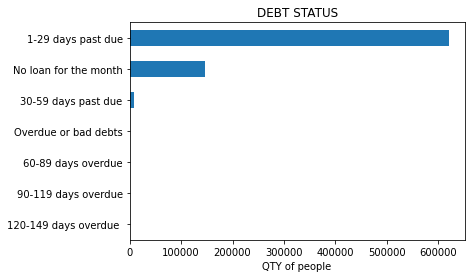

In [ ]:
#Identify STATUS groups
debtors = df_final.groupby('STATUS')['ID'].count().sort_values(ascending=True).plot(kind='barh')
debtors.set(xlabel='QTY of people', ylabel='', title='DEBT STATUS')

Se puede observar una mayor cantidad de personas con poco tiempo de deuda dentro de sus préstamos, mayoritariamente dentro del primer mes de tomar la deuda.

**Conclusión: La mayor cantidad de gente no toma deuda por mas de 1 mes, suelen pagar antes de llegar al segundo mes. Quedan personas con 30-59 dias de atraso en sus pagos, pero son pocos.**

**2) ¿De las personas relevadas, la edad influye en el nivel de educación?**


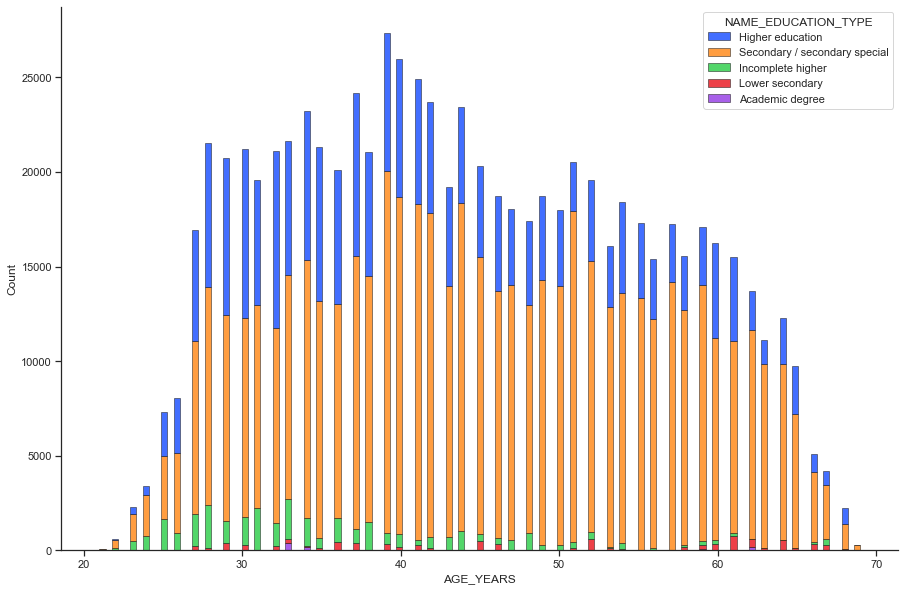

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

sns.set_theme(style="ticks")


f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f)

sns.histplot(
    df_final,
    x="AGE_YEARS", hue="NAME_EDUCATION_TYPE",
    palette="bright",
    edgecolor=".1",
    linewidth=.5,
    multiple="stack",
    )

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([20, 30, 40, 50, 60, 70])

En este grafico podemos evaluar cual es el nivel educacional a lo largo de la vida de las personas muestreadas en el dataset, 
con distintos picos y una curva de crecimiento educacional muy clara hasta los 40 años siendo  "Higher Education" y "Secondary Education" los valores con mayor cantidad de personas. Por otra parte "Incomplete Higher" queda en tercer lugar con una reduccion muy considerable en comparacion a los primeros dos, y finalmente "Lower Secondary" y "Academic Degree" siendo los grupos mas pequeños de personas y con una muy pequeña cantidad de gente muestreada con titulo universitario.

**conclusión: LA EDAD INFLUYE EN EL NIVEL DE EDUCACIÓN**

**3) ¿Existe una brecha salarial por género dentro del dataset?**

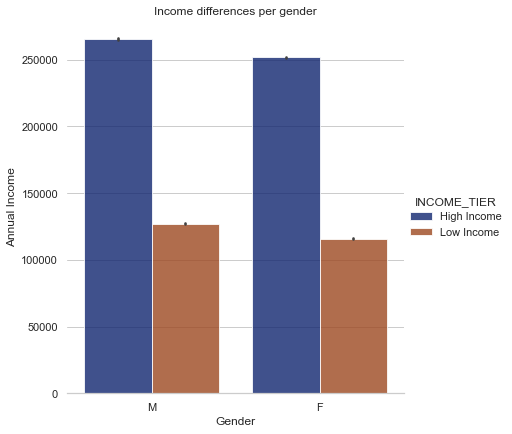

In [ ]:
#Income differences per gender
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_final, kind="bar",
    x="CODE_GENDER", y="AMT_INCOME_TOTAL", hue="INCOME_TIER", palette="dark", alpha=.8, height=6
).set(title='Income differences per gender')

g.despine(left=True)
g.set_axis_labels("Gender", "Annual Income")



Se puede observar una salario promedio mayor de los hombres por sobre las mujeres tanto en las personas de altos ingresos como para personas de bajos ingresos

**Conclusión: HAY RELACIÓN PROPORCIONAL ENTRE EL SUELDO Y EL GÉNERO**

**4) ¿Hay algun tipo de tendencia deudora dentro de los grupos viviendas?**

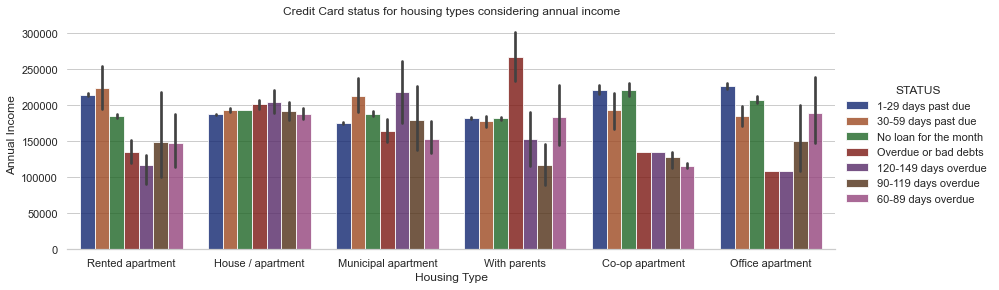

In [ ]:
#Credit Card status for housing types considering annual income
from turtle import width


sns.set_theme(style="whitegrid")



df_final.sort_values(by='AMT_INCOME_TOTAL', ascending=False)
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_final, kind="bar",
    x="NAME_HOUSING_TYPE", y='AMT_INCOME_TOTAL', hue="STATUS", palette="dark", alpha=.8, height=4, aspect= 3
).set(title='Credit Card status for housing types considering annual income')

g.despine(left=True)
g.set_axis_labels("Housing Type", "Annual Income")



Se puede observar mayor cantidad de deudores dentro de los grupos de viviendas de personas que viven con sus padres, en departamentos municipales o personas con casa/departamento.

**Conclusión: HAY MAYOR CANTIDAD DE DEUDORES EN LOS GRUPOS DE VIVIENDA DE GENTE QUE VIVE CON SUS PADRES Y MENOR CANTIDAD DE DEUDORES EN PERSONAS QUE ALQUILAN**

**5) ¿de las personas relevadas, el estado civil influye sobre la densidad de las familias?**

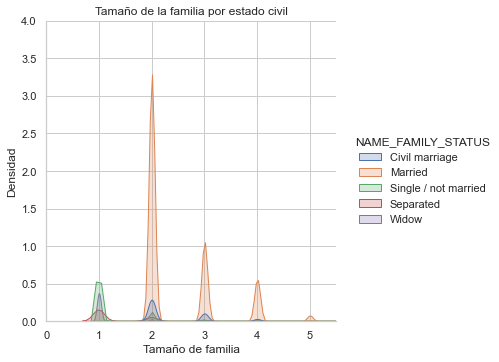

In [ ]:
# Figure -level

ax = sns.displot(data=df_final, x='CNT_FAM_MEMBERS', kind='kde', hue='NAME_FAMILY_STATUS', fill=True).set(xlim=(0,5.5),ylim=(0,4))
ax.set(xlabel='Tamaño de familia', ylabel='Densidad', title='Tamaño de la familia por estado civil')

Se puede observar una mayor densidad de personas casadas con familias más grandes, seguido por personas casadas por civil y gran densidad por parte de las personas solteras sin hijos.

**Conclusión: SI BIEN SE PUEDE OBSERVAR A SIMPLE VISTA QUE LAS FAMILIAS MAS GRANDES ESTAN LIGADAS A LAS PERSONAS CASADAS. NO PODEMOS CONCLUIR QUE EXISTA RELACION PROPORCIONAL ENTRE LA DENSIDAD DE LAS FAMILIAS Y EL ESTADO CIVIL**

**6) ¿de las personas relevadas, el nivel de educación influye sobre el tamaño de las familias?**

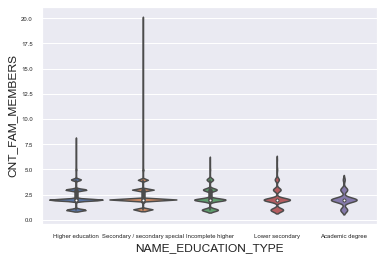

<Figure size 1080x720 with 0 Axes>

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")


# Change width
sns.violinplot(x=df["NAME_EDUCATION_TYPE"], y=df["CNT_FAM_MEMBERS"], width=1)
plt.tick_params(labelsize=6)
plt.figure(figsize=(15, 10))
plt.show()


Se puede observar un tamaño familiar mas numeroso en personas con mayor educación

**conclusión: SE PUEDE ESTABLECER QUE EXISTE RELACION PROPORCIONAL ENTRE EL NUMERO DE FAMILIAS Y EL NIVEL EDUCATIVO.**



**7) ¿de las personas relevadas, la relacion tamaño de familia y cantidad de hijos es mas influyente para mujeres o hombres?**

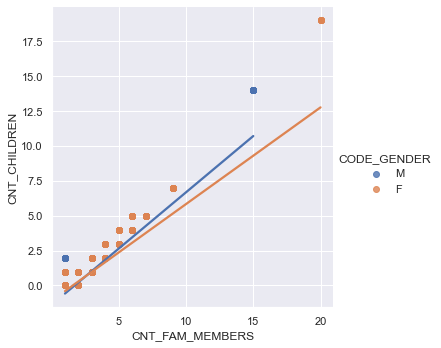

In [ ]:


import seaborn as sns; sns.set(color_codes=True)

g = sns.lmplot(x="CNT_FAM_MEMBERS", y="CNT_CHILDREN", hue="CODE_GENDER", data=df_final)

En este gráfico podemos observar los tamaños de familia y su respectiva cantidad de hijos, diferenciado por hombres y mujeres.
Cabe destacar que el dataset contiene una gran mayoría de mujeres

**conclusión: PODEMOS DECIR QUE NO SE PUEDE DETERMINAR SI LA RELACION TAMAÑO DE FAMILIA Y CANTIDAD DE HIJO ES MAS INFLUYENTE PARA MUJERES O HOMBRES, YA QUE EN EL DATASET EN CUESTION HAY MAS MUJERES QUE HOMBRES**

**EXPLORATORY DATA ANALYSIS**

Llegando al apartado de analisis de nuestro trabajo, pudimos extraer informacion valiosa para darle un contexto mas preciso a nuestra información relevada.
Los apartados principales que fueron observados en nuestro analisis fueron los siguientes:

**-de las personas analizadas la mayor cantidad de gente no toma deuda por mas de 1 mes, suelen pagar antes de llegar al segundo mes. Quedan personas con 30-59 dias de atraso en sus pagos, pero son pocos.**

**-En cuanto a si la edad influye en el nivel de educacion, podemos destacar que, previo a un analisis, determinamos  que existen distintos picos y una curva de crecimiento educacional muy clara hasta los 40 años siendo "Higher Education" y "Secondary Education" los valores con mayor cantidad de personas. Por otra parte "Incomplete Higher" queda en tercer lugar con una reduccion muy considerable en comparacion a los primeros dos, y finalmente "Lower Secondary" y "Academic Degree" siendo los grupos mas pequeños de personas y con una muy pequeña cantidad de gente muestreada con titulo universitario. Por esto, se puede concluir que la edad si influye de manera proporcional con respecto a la educación.**

**-En cuanto a la relacion sueldo-género planteada en el analisis, se concluye que claramente existe una relacion proporcional entre ambas. Es decir, se puede observar una salario promedio mayor de los hombres por sobre las mujeres tanto en las personas de altos ingresos como para personas de bajos ingresos.**

**-Se puede observar mayor cantidad de deudores dentro de los grupos de viviendas de personas que viven con sus padres, en departamentos municipales o personas con casa/departamento.**

**- Analizando si el estado civil influye sobre la densidad familiar, concluimos que, se puede observar una mayor densidad de personas casadas con familias más grandes, seguido por personas casadas por civil y gran densidad por parte de las personas solteras sin hijos.**

**-En cuanto a la relacion entre el nivel educativo y el tamaño familiar, claramente hay una tendencia que expone lo siguiente: mientras mas educación, mayor es el tamaño familiar.**

**-De las personas relevadas, la relacion tamaño de familia y cantidad de hijos es mas influyente para mujeres que para hombres. Pero esta conclusion no es excluyente, ya que en nuestro analisis contamso con mas personas de genero femenino que masculino.**

**RECOMENDACIONES CON BASE EN INSIGHTS OBERSVADOS**

Podemos ver que es poca la gente que toma deudas de +30 días. Además se aprecia que los salarios son mayores en hombres que en mujeres a nivel general; y que el mayor grado de educación se da entre la población de 27/28 años hasta los 49/50 años y que en relación a esto, se observa la clara tendencia de: a mayor educación, familia más numerosa. 